<a href="https://colab.research.google.com/github/funkdub/All-GANs-Reiterations-with-their-papers/blob/master/3_DCGAN_Transfer_D_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision.datasets as datasets
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
print(torch.__version__)
import matplotlib.pyplot as plt

1.1.0


In [0]:
def show_img(img,new_fig=True):
  grid = vutils.make_grid(img.detach().cpu(),nrow=8,normalize=True,pad_value=0.3)
  grid = grid.transpose(0,2).transpose(0,1)
  if new_fig:
    plt.figure()
  plt.imshow(grid.numpy())
  
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv')!=-1:
    nn.init.normal_(m.weight.data,0.0,0.02)
  elif classname.find('BatchNorm')!=-1:
    nn.init.normal_(m.weight.data,1.0,0.02)
    nn.init.constant_(m.bias.data,0)
  

In [0]:
class Discriminator(torch.nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.main = nn.Sequential(
        nn.Conv2d(3,64,4,2,1,bias=False),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(64,128,4,2,1,bias=False),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(128,256,4,2,1,bias=True),
        nn.BatchNorm2d(256),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(256,512,4,2,1,bias=False),
        nn.BatchNorm2d(512),
        nn.LeakyReLU(0.2,inplace=True),
        nn.Conv2d(512,1,4,1,0,bias=False),
        nn.Sigmoid()
    )
  def forward(self,input):
    return self.main(input)

class Generator(torch.nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.main = nn.Sequential(
        nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(True), 
        
        nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
        nn.Tanh()
    )
  def forward(self,input):
    return self.main(input)
    
D = Discriminator()
G = Generator()

print(D)
print(G)

for name,p in D.named_parameters():
  print(name,p.shape)
for name,p in G.named_parameters():
  print(name,p.shape)

Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)
Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100,

In [0]:
dataset = datasets.CIFAR10(root='./CIFAR10/',
                          transform=transforms.Compose([
                                                        transforms.Resize(64),
                                                        transforms.ToTensor(),
                                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]),
                          download=True)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

0it [00:00, ?it/s]

100%|█████████▉| 169697280/170498071 [00:11<00:00, 32020945.45it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 64, 64])


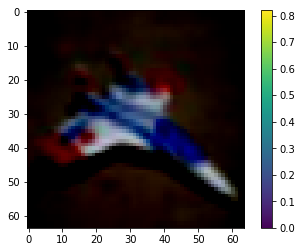

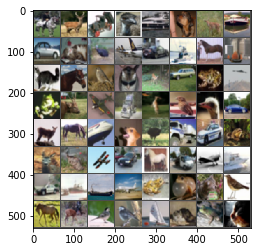

In [0]:
# test
import numpy as np
x,_ = dataset[30]
print(x.shape)
plt.imshow(np.transpose(x.numpy(),[1,2,0]))
plt.colorbar()
# dataloader and dataset
x_batch,_ = iter(dataloader).next()
x_batch.shape
#D(x_batch)
D(x_batch).shape
show_img(x_batch)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:0,iter:0/782,last ma? D(x)=0.6357 D(G(z))=0.0000
epoch:0,iter:100/782,last ma? D(x)=0.5509 D(G(z))=0.5193
epoch:0,iter:200/782,last ma? D(x)=0.6862 D(G(z))=0.1582
epoch:0,iter:300/782,last ma? D(x)=0.5133 D(G(z))=0.3800
epoch:0,iter:400/782,last ma? D(x)=0.5647 D(G(z))=0.2583
epoch:0,iter:500/782,last ma? D(x)=0.6065 D(G(z))=0.1824
epoch:0,iter:600/782,last ma? D(x)=0.7040 D(G(z))=0.1179
epoch:0,iter:700/782,last ma? D(x)=0.4335 D(G(z))=0.5030
epoch:1,iter:0/782,last ma? D(x)=0.0854 D(G(z))=0.4666
epoch:1,iter:100/782,last ma? D(x)=0.2197 D(G(z))=0.2830
epoch:1,iter:200/782,last ma? D(x)=0.4159 D(G(z))=0.1779
epoch:1,iter:300/782,last ma? D(x)=0.6536 D(G(z))=0.2102
epoch:1,iter:400/782,last ma? D(x)=0.4899 D(G(z))=0.3900
epoch:1,iter:500/782,last ma? D(x)=0.8717 D(G(z))=0.1338
epoch:1,iter:600/782,last ma? D(x)=0.8121 D(G(z))=0.0544
epoch:1,iter:700/782,last ma? D(x)=0.7769 D(G(z))=0.0950
epoch:2,iter:0/782,last ma? D(x)=0.4627 D(G(z))=0.3370
epoch:2,iter:100/782,last ma? D(x)=0.

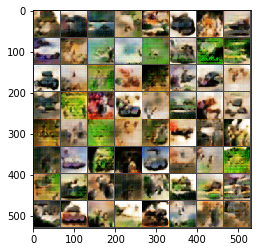

In [0]:
#train loop
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

D = Discriminator().to(device)
G = Generator().to(device)

D.apply(weights_init)
G.apply(weights_init)

criterion = nn.BCELoss()
D_optimizer = torch.optim.Adam(D.parameters(),lr=0.01,betas=(0.5,0.999))
G_optimizer = torch.optim.Adam(G.parameters(),lr=0.01,betas=(0.5,0.999))

lab_real = torch.ones(64,1,device=device)
lab_fake = torch.zeros(64,1,device=device)


# record
G_losses = []
D_losses = []
collection_x_generate = []

fixed_noise = torch.randn(64,100,1,1,device=device)
fig = plt.figure()
plt.ion()


for epoch in range(5):
  for i,data in enumerate(dataloader,0):
    # train the Discriminator
    x_real,_ = iter(dataloader).next()
    x_real = x_real.to(device)
    
    D_optimizer.zero_grad()
    
    D_x = D(x_real).view(-1)
    
    # 让判别器正确判断真实图像
    D_loss_real = criterion(D_x, lab_real)
    
    z = torch.randn(64,100,1,1,device=device)
    x_gen = G(z).detach()
    D_G_z = D(x_gen).view(-1)
    # 让判别器更容易做出正确判断吗，即将生成图像判断为生成图像
    D_loss_fake = criterion(D_G_z, lab_fake)
    
    D_loss = D_loss_real + D_loss_fake
    D_loss.backward()
    D_optimizer.step()
    # train the Generator
    G_optimizer.zero_grad()
    
    z = torch.randn(64,100,1,1,device=device)
    x_gen = G(z)
    D_G_z = D(x_gen).view(-1)
    # 让生成的图像 更容易被判断器判别为真实图像
    G_loss = criterion(D_G_z, lab_real)
    G_loss.backward()
    G_optimizer.step()
    
    if i%100 == 0:
      x_gen = G(fixed_noise)
      show_img(x_gen,new_fig=False)
      fig.canvas.draw()
      # D(X)判别器判断真实图像x为真是图像的概率
      # D(G(z))判别器判断生成器从噪声z生成的图像G(z)为真实图像的概率
      print('epoch:{},iter:{}/{},last ma? D(x)={:.4f} D(G(z))={:.4f}'.format(
            epoch,i,len(dataloader),D_x.mean().item(),D_G_z.mean().item()))
      G_losses.append(G_loss.item())
      D_losses.append(D_loss.item())
      
  x_gen = G(fixed_noise)
  collection_x_generate.append(x_gen.detach().clone())

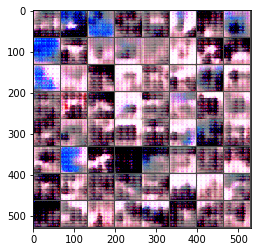

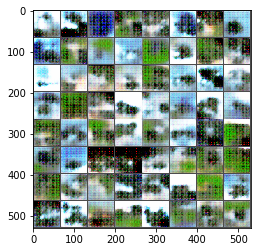

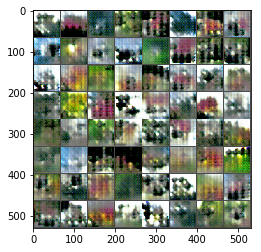

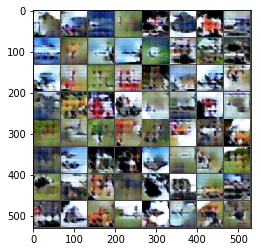

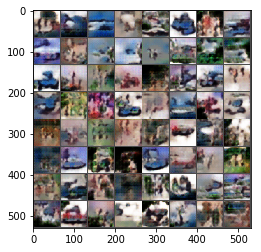

In [0]:
 for x_gen in collection_x_generate:
  show_img(x_gen)

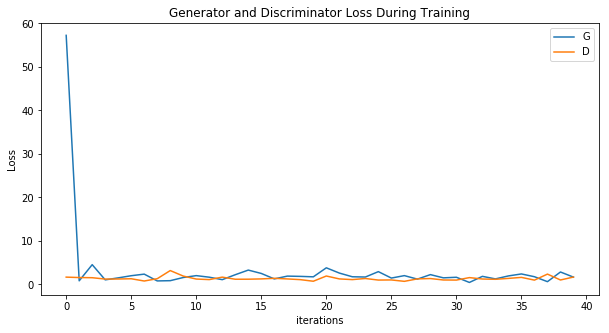

In [0]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

### **使用迁移学习的D效果**

In [1]:
import torch
import torchvision.datasets as datasets
import torchvision.utils as vutils
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
print(torch.__version__)
import matplotlib.pyplot as plt

def show_img(img,new_fig=True):
  grid = vutils.make_grid(img.detach().cpu(),nrow=8,normalize=True,pad_value=0.3)
  grid = grid.transpose(0,2).transpose(0,1)
  if new_fig:
    plt.figure()
  plt.imshow(grid.numpy())
  
def weights_init(m):
  classname = m.__class__.__name__
  if classname.find('Conv')!=-1:
    nn.init.normal_(m.weight.data,0.0,0.02)
  elif classname.find('BatchNorm')!=-1:
    nn.init.normal_(m.weight.data,1.0,0.02)
    nn.init.constant_(m.bias.data,0)
    
dataset = datasets.CIFAR10(root='./CIFAR10/',
                          transform=transforms.Compose([
                                                        transforms.Resize(64),
                                                        transforms.ToTensor(),
                                                        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))]),
                          download=True)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=64,shuffle=True)

1.1.0
Files already downloaded and verified


In [0]:
class Generator(torch.nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.main = nn.Sequential(
        nn.ConvTranspose2d(100, 512, 4, 1, 0, bias=False),
        nn.BatchNorm2d(512),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
        nn.BatchNorm2d(256),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(True),
        
        nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(True), 
        
        nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
        nn.Tanh()
    )
  def forward(self,input):
    return self.main(input)
    
import torchvision.models as models
#D = models.resnet34(pretrained=True)

#G = Generator()

#print(D)
#print(G)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([64, 1])) that is different to the input size (torch.Size([64])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:0,iter:0/782,last ma? D(x)=0.4317 D(G(z))=0.8992
epoch:0,iter:100/782,last ma? D(x)=0.5318 D(G(z))=0.5527
epoch:0,iter:200/782,last ma? D(x)=0.9951 D(G(z))=0.0034
epoch:0,iter:300/782,last ma? D(x)=0.9712 D(G(z))=0.0078
epoch:0,iter:400/782,last ma? D(x)=0.9196 D(G(z))=0.0211
epoch:0,iter:500/782,last ma? D(x)=0.7016 D(G(z))=0.7165
epoch:0,iter:600/782,last ma? D(x)=0.8800 D(G(z))=0.0279
epoch:0,iter:700/782,last ma? D(x)=0.9386 D(G(z))=0.0217
epoch:1,iter:0/782,last ma? D(x)=0.9909 D(G(z))=0.0043
epoch:1,iter:100/782,last ma? D(x)=0.9786 D(G(z))=0.0083
epoch:1,iter:200/782,last ma? D(x)=0.1101 D(G(z))=0.6978
epoch:1,iter:300/782,last ma? D(x)=0.9972 D(G(z))=0.0012
epoch:1,iter:400/782,last ma? D(x)=0.9714 D(G(z))=0.0121
epoch:1,iter:500/782,last ma? D(x)=0.8726 D(G(z))=0.0609
epoch:1,iter:600/782,last ma? D(x)=0.8778 D(G(z))=0.0001
epoch:1,iter:700/782,last ma? D(x)=0.9930 D(G(z))=0.0018
epoch:2,iter:0/782,last ma? D(x)=0.9876 D(G(z))=0.0002
epoch:2,iter:100/782,last ma? D(x)=0.

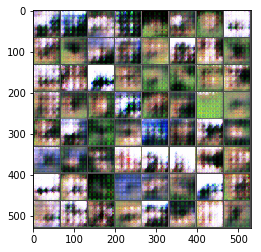

In [6]:

#train loop
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

#D = Discriminator().to(device)
D = models.resnet34(pretrained=True).to(device)
G = Generator().to(device)

D.fc = nn.Sequential(nn.Linear(in_features=512,out_features=1),
                    nn.Sigmoid()).to(device)

#D.apply(weights_init)
G.apply(weights_init)

criterion = nn.BCELoss()
D_optimizer = torch.optim.Adam(D.parameters(),lr=0.01,betas=(0.5,0.999))
G_optimizer = torch.optim.Adam(G.parameters(),lr=0.01,betas=(0.5,0.999))

lab_real = torch.ones(64,1,device=device)
lab_fake = torch.zeros(64,1,device=device)


# record
G_losses = []
D_losses = []
collection_x_generate = []

fixed_noise = torch.randn(64,100,1,1,device=device)
fig = plt.figure()
plt.ion()


for epoch in range(5):
  for i,data in enumerate(dataloader,0):
    # train the Discriminator
    x_real,_ = iter(dataloader).next()
    x_real = x_real.to(device)
    
    D_optimizer.zero_grad()
    D_x = D(x_real).view(-1)
    
    # 让判别器正确判断真实图像

    D_loss_real = criterion(D_x, lab_real)
    
    z = torch.randn(64,100,1,1,device=device)
    x_gen = G(z).detach()
    D_G_z = D(x_gen).view(-1)
    # 让判别器更容易做出正确判断吗，即将生成图像判断为生成图像
    D_loss_fake = criterion(D_G_z, lab_fake)
    
    D_loss = D_loss_real + D_loss_fake
    D_loss.backward()
    D_optimizer.step()
    # train the Generator
    G_optimizer.zero_grad()
    
    z = torch.randn(64,100,1,1,device=device)
    x_gen = G(z)
    D_G_z = D(x_gen).view(-1)
    # 让生成的图像 更容易被判断器判别为真实图像
    G_loss = criterion(D_G_z, lab_real)
    G_loss.backward()
    G_optimizer.step()
    
    if i%100 == 0:
      x_gen = G(fixed_noise)
      show_img(x_gen,new_fig=False)
      fig.canvas.draw()
      # D(X)判别器判断真实图像x为真是图像的概率
      # D(G(z))判别器判断生成器从噪声z生成的图像G(z)为真实图像的概率
      print('epoch:{},iter:{}/{},last ma? D(x)={:.4f} D(G(z))={:.4f}'.format(
            epoch,i,len(dataloader),D_x.mean().item(),D_G_z.mean().item()))
      G_losses.append(G_loss.item())
      D_losses.append(D_loss.item())
      
  x_gen = G(fixed_noise)
  collection_x_generate.append(x_gen.detach().clone())

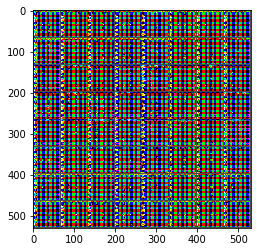

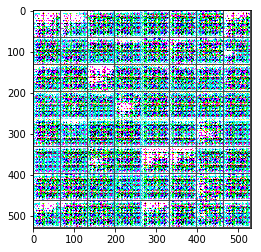

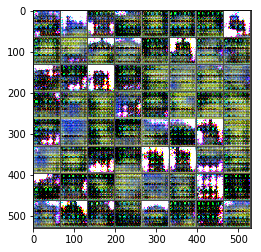

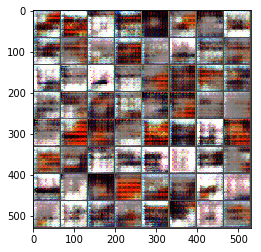

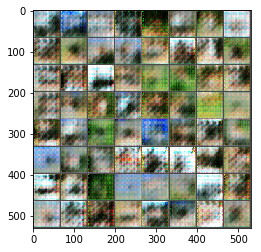

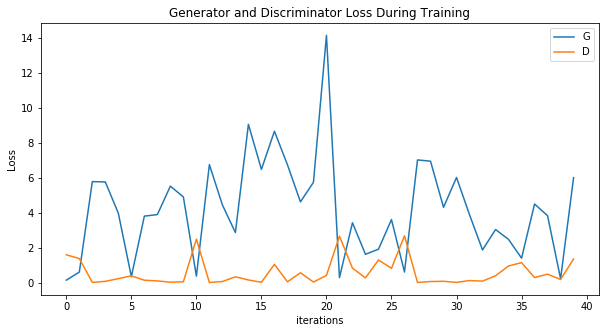

In [7]:
for x_gen in collection_x_generate:
  show_img(x_gen)
  
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()